<a href="https://colab.research.google.com/github/pavi-ninjaac/SARS_CoV_2_DNA_Analysis/blob/main/DNA_Analysis_CovidvsHIV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DNA Classification - COVID19 vs HIV

In [2]:
! pip install Bio

     |████████████████████████████████| 71kB 3.2MB/s 
     |████████████████████████████████| 2.3MB 7.0MB/s 


In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for fasta file handling 
from Bio import SeqIO

In [8]:
def generate_data(file_list):
  X = []
  y = []
  label = 1 # for hiv
  for i in file_list:
    filepath = '/content/drive/MyDrive/Colab Notebooks/dataFiles/DNA_Genome_Analysis_covid19/'+i+'.fasta'
    records = list(SeqIO.parse(filepath , 'fasta'))

    for index in range(len(records)):
      X.append(str(records[index].seq))
      y.append(label)
    label = 0 #for covid19
  
  data = pd.DataFrame({'DNASequence' : X , 'label' : y})

  return data

In [9]:
file_list = ['HIV' , 'covid19']
data = generate_data(file_list)
data.head(5)

,DNASequence,label
0,CCTCAAATCACTCTTTGGCAGCGACCCCTGGTCTCAATAAAAGTAG...,1
1,CCTCAAATCACTCTTTGGCAGCGACCCCTGGTCTCAATAAAAGTAG...,1
2,CCTCAAATCACTCTTTGGCAGCGACCCCTGGTCCCAATAAAAGTAG...,1
3,CCTCAAATCACTCTTTGGCAGCGACCCCTGGTCTCAATAAAAGTAG...,1
4,CCTCAAATCACTCTTTGGCAGCGACCCCTGGTCYCAATAAAAGTAG...,1


# Category analysis

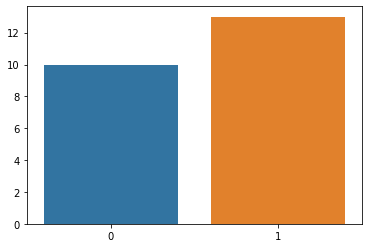

In [16]:
category = data['label'].value_counts()
sns.barplot(x=category.index,y=category.values)